<a href="https://colab.research.google.com/github/VesperHRC/GWU_DNSC_6301_Project/blob/main/Team_22_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree                                            # sklearn tree model for decision trees
from sklearn.model_selection import train_test_split                # for partitioning data
from sklearn.model_selection import cross_val_score                 # for cross validation
from sklearn.metrics import roc_auc_score, accuracy_score           # to asses decision tree perforamce

# to upload local files
import io
from google.colab import files             

import numpy as np                                   # array, vector, matrix calculations
import pandas as pd                                  # dataFrame handling

from matplotlib import pyplot as plt                 # plotting
import seaborn as sns                                # slightly better plotting  

SEED = 12345                                         # ALWAYS use a random seed for better reproducibility

In [ ]:
# special google colab command to upload a file from your computer
uploaded = files.upload()

Saving credit_line_increase(2).csv to credit_line_increase(2).csv


In [ ]:
type(uploaded) # what kind of Python object did we just create?

dict

In [ ]:
# read uploaded data into a pandas dataframe
data = pd.read_csv(io.StringIO(uploaded['credit_line_increase(2).csv'].decode('utf-8')))

In [ ]:
data.shape # (rows, columns)

(30000, 26)

In [ ]:
data.columns # names of columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DELINQ_NEXT'],
      dtype='object')

In [ ]:
data.isnull().any() # check for missing values

ID             False
LIMIT_BAL      False
SEX            False
RACE           False
EDUCATION      False
MARRIAGE       False
AGE            False
PAY_0          False
PAY_2          False
PAY_3          False
PAY_4          False
PAY_5          False
PAY_6          False
BILL_AMT1      False
BILL_AMT2      False
BILL_AMT3      False
BILL_AMT4      False
BILL_AMT5      False
BILL_AMT6      False
PAY_AMT1       False
PAY_AMT2       False
PAY_AMT3       False
PAY_AMT4       False
PAY_AMT5       False
PAY_AMT6       False
DELINQ_NEXT    False
dtype: bool

In [ ]:
data.describe() # basic descriptive statistics

ID       LIMIT_BAL  ...       PAY_AMT6   DELINQ_NEXT
count  30000.000000    30000.000000  ...   30000.000000  30000.000000
mean   15000.500000   167484.322667  ...    5215.502567      0.221200
std     8660.398374   129747.661567  ...   17777.465775      0.415062
min        1.000000    10000.000000  ...       0.000000      0.000000
25%     7500.750000    50000.000000  ...     117.750000      0.000000
50%    15000.500000   140000.000000  ...    1500.000000      0.000000
75%    22500.250000   240000.000000  ...    4000.000000      0.000000
max    30000.000000  1000000.000000  ...  528666.000000      1.000000

[8 rows x 26 columns]

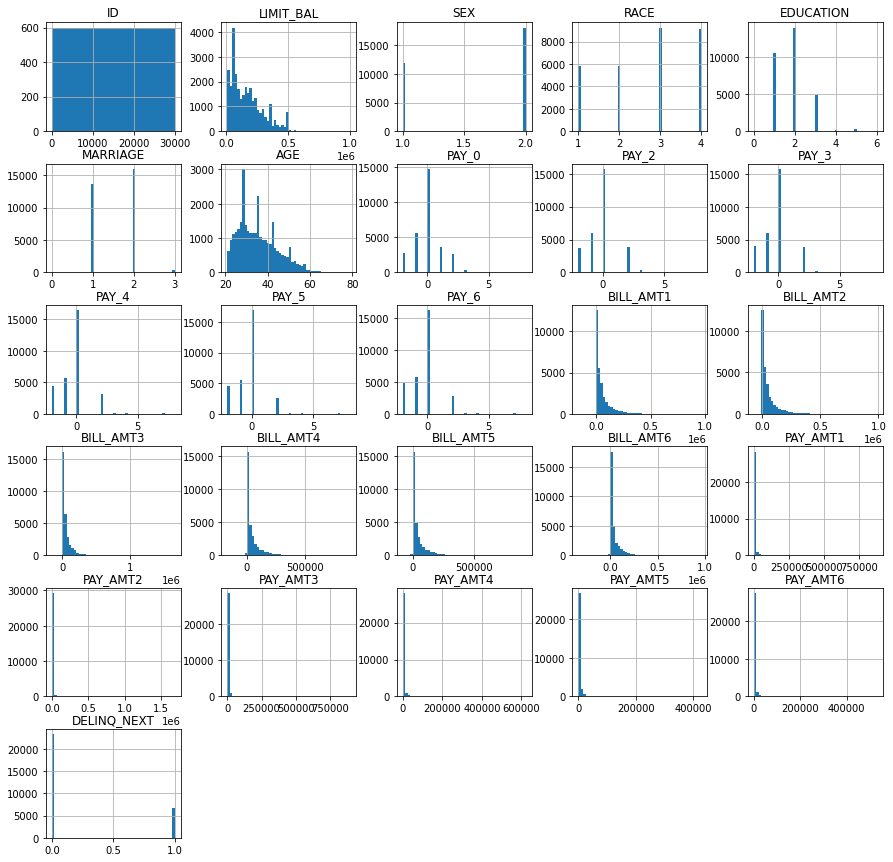

In [ ]:
_ = data[data.columns].hist(bins=50, figsize=(15, 15)) # display histograms

In [ ]:
# Pearson correlation matrix
corr = data.corr() 
corr


ID  LIMIT_BAL       SEX  ...  PAY_AMT5  PAY_AMT6  DELINQ_NEXT
ID           1.000000   0.026179  0.018497  ...  0.000652  0.003000    -0.013952
LIMIT_BAL    0.026179   1.000000  0.024755  ...  0.217202  0.219595    -0.153520
SEX          0.018497   0.024755  1.000000  ... -0.001667 -0.002766    -0.039961
RACE        -0.000710   0.044173  0.006149  ...  0.022148  0.020259    -0.303811
EDUCATION    0.039177  -0.219161  0.014232  ... -0.040358 -0.037200     0.028006
MARRIAGE    -0.029079  -0.108139 -0.031389  ... -0.001205 -0.006641    -0.024339
AGE          0.018678   0.144713 -0.090874  ...  0.022850  0.019478     0.013890
PAY_0       -0.030575  -0.271214 -0.057643  ... -0.058190 -0.058673     0.324794
PAY_2       -0.011215  -0.296382 -0.070771  ... -0.037093 -0.036500     0.263551
PAY_3       -0.018494  -0.286123 -0.066096  ... -0.035863 -0.035861     0.235253
PAY_4       -0.002735  -0.267460 -0.060173  ... -0.033590 -0.026565     0.216614
PAY_5       -0.022199  -0.249411 -0.055064  ... -0.033337 -0.023027     0.204149
PAY_6       -0.020270  -0.235195 -0.044008  ... -0.046434 -0.025299     0.186866
BILL_AMT1    0.019389   0.285430 -0.033642  ...  0.167026  0.179341    -0.019644
BILL_AMT2    0.017982   0.278314 -0.031183  ...  0.157957  0.174256    -0.014193
BILL_AMT3    0.024354   0.283236 -0.024563  ...  0.179712  0.182326    -0.014076
BILL_AMT4    0.040351   0.293988 -0.021880  ...  0.160433  0.177637    -0.010156
BILL_AMT5    0.016705   0.295562 -0.017005  ...  0.141574  0.164184    -0.006760
BILL_AMT6    0.016730   0.290389 -0.016733  ...  0.307729  0.115494    -0.005372
PAY_AMT1     0.009742   0.195236 -0.000242  ...  0.148459  0.185735    -0.072929
PAY_AMT2     0.008406   0.178408 -0.001391  ...  0.180908  0.157634    -0.058579
PAY_AMT3     0.039151   0.210167 -0.008597  ...  0.159214  0.162740    -0.056250
PAY_AMT4     0.007793   0.203242 -0.002229  ...  0.151830  0.157834    -0.056827
PAY_AMT5     0.000652   0.217202 -0.001667  ...  1.000000  0.154896    -0.055124
PAY_AMT6     0.003000   0.219595 -0.002766  ...  0.154896  1.000000    -0.053183
DELINQ_NEXT -0.013952  -0.153520 -0.039961  ... -0.055124 -0.053183     1.000000

[26 rows x 26 columns]

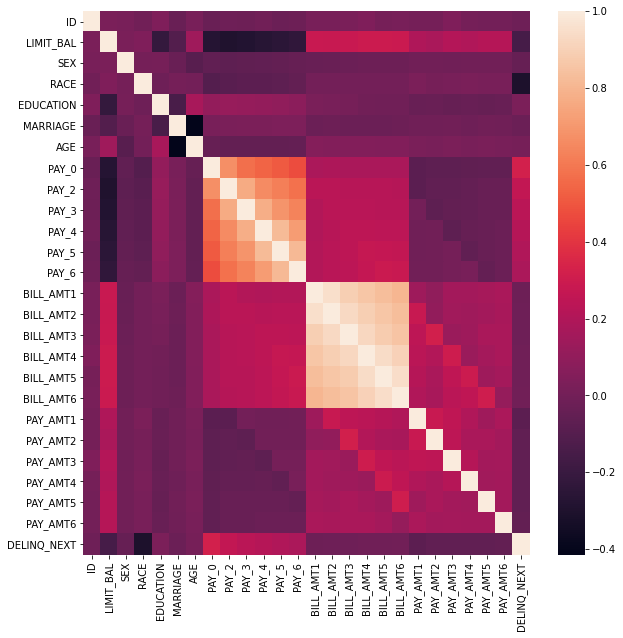

In [ ]:
# correlation heatmap
plt.figure(figsize=(10, 10))
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

###Train Tree

In [ ]:
# assign basic modeling roles
# do not put demographic variables into a financial model!
y_name = 'DELINQ_NEXT'
X_names = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
# partition data for honest assessment
train_X, valid_test_X, train_y, valid_test_y = train_test_split(data[X_names], data[y_name], test_size=0.3, random_state=SEED) # split off training data
valid_X, test_X, valid_y, test_y = train_test_split(valid_test_X, valid_test_y, test_size=0.5, random_state=SEED) # split remainder into validation and test

# summarize 
print('Training data: %i rows and %i columns' % (train_X.shape[0], train_X.shape[1] + 1))
print('Validation data: %i rows and %i columns' % (valid_X.shape[0], valid_X.shape[1] + 1))
print('Testing data: %i rows and %i columns' % (test_X.shape[0], test_X.shape[1] + 1))

# housekeeping
del valid_test_X 
del valid_test_y

Training data: 21000 rows and 20 columns
Validation data: 4500 rows and 20 columns
Testing data: 4500 rows and 20 columns


In [ ]:
#Ensemble Import
from sklearn.ensemble import RandomForestClassifier


In [ ]:

# train decision tree
# using grid search to determine best estimators and depth

from itertools import product
estimators = [100,200,300,400,500]
depth = [7, 8, 9, 10, 11, 12]


# cycle through tree depths to find best model
# in validation data
for e,d in product(estimators,depth) :

  #Fit it to the data
  clf = RandomForestClassifier(n_estimators = e, max_depth = d, random_state = SEED)
  clf.fit(train_X, train_y)

  #score training and validation data
  train_phat = clf.predict_proba(train_X)[:, 1]
  valid_phat = clf.predict_proba(valid_X)[:, 1] 

  #calculate AUC to assess performance quality
  train_auc = roc_auc_score(train_y, train_phat)
  valid_auc = roc_auc_score(valid_y, valid_phat)

  #calculate cross validation scores to assess stability in data
  cv_scores = cross_val_score(clf, valid_X, valid_y, scoring = 'roc_auc', cv=5)
  cv_std = np.std(cv_scores)

  #print results
  print(e, d, train_auc, valid_auc, cv_std)

In [ ]:

estimators = 100
depth = 9
candidate_models = {}

  #Fit it to the data
clf = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state = SEED)
clf.fit(train_X, train_y)

  #score training and validation data
train_phat = clf.predict_proba(train_X)[:, 1]
valid_phat = clf.predict_proba(valid_X)[:, 1] 

  #calculate AUC to assess performance quality
train_auc = roc_auc_score(train_y, train_phat)
valid_auc = roc_auc_score(valid_y, valid_phat)

  #calculate cross validation scores to assess stability in data
cv_scores = cross_val_score(clf, valid_X, valid_y, scoring = 'roc_auc', cv=5)
cv_std = np.std(cv_scores)

  #store results
print(estimators, depth, train_auc, valid_auc, cv_std)
  #store results
candidate_models[depth] = {}
candidate_models[depth]['Models']=clf
candidate_models[depth]['Training AUC']=train_auc
candidate_models[depth]['Validation AUC']=valid_auc
candidate_models[depth]['5-fold SD']=cv_std

100 9 0.8391304252089207 0.781460409281032 0.01750501079942772


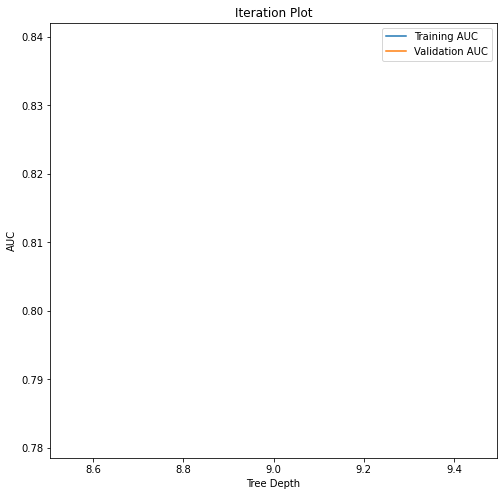

In [ ]:
candidate_results = pd.DataFrame.from_dict(candidate_models, orient='index')
fig, ax = plt.subplots(figsize=(8, 8))
_ = candidate_results[['Training AUC', 'Validation AUC']].plot(title='Iteration Plot',
                                                               ax=ax)
_ = ax.set_xlabel('Tree Depth')
_ = ax.set_ylabel('AUC')

In [ ]:
candidate_results.iloc[:, 1:]

Training AUC  Validation AUC  5-fold SD
9       0.83913         0.78146   0.017505

In [ ]:
# plot the tree for human interpretation
best_model = candidate_models[9]['Models']
fig = plt.figure(figsize=(400,70))
_ = tree.plot_tree(best_model.estimators_[0], feature_names = X_names, class_names = ['On Time', 'Delinquent'], filled=True)

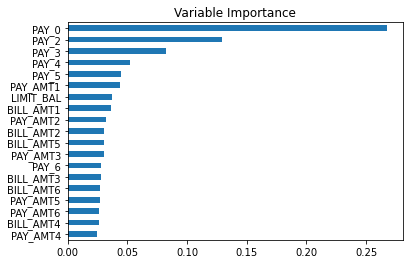

In [ ]:
# plot variable importances
# create pandas dataframe
# plot dataframe values
importances = pd.DataFrame(best_model.feature_importances_,
                           index=X_names,
                           columns=['Importance'])
_ = importances.sort_values(by='Importance').plot(kind='barh', title='Variable Importance', legend=False)

In [ ]:
# score on test data for 
# final HONEST assessment
# this is not to see how well the model *did*!
# it's to get an assessment of how it *will do* on unseen data!
test_phat = best_model.predict_proba(test_X)[:, 1]
print('Test AUC: %.4f' % roc_auc_score(test_y, test_phat))

Test AUC: 0.7731


###Function to Create Confusion Matrices

In [ ]:
# function for confusion matrices
def get_confusion_matrix(frame, y, yhat, by=None, level=None, cutoff=0.5, verbose=True):

  #determine levels of target (y) variable
  #sort for consistency
  level_list = list(frame[y].unique())
  level_list.sort(reverse=True)

  #init confusion matrix
  cm_frame = pd.DataFrame(columns=['actual: ' + str(i) for i in level_list],
                          index=['predicted: ' + str(i) for i in level_list])
  
  #don't destroy original data
  frame_ = frame.copy(deep=True)

  #convert numeric predictions to binary decisions using cutoff
  dname = 'd_' + str(y)
  frame_[dname] = np.where(frame_[yhat] > cutoff, 1, 0)

  #slice frame
  if (by is not None) & (level is not None):
    frame_ = frame_[frame[by] == level]

  #calculate sixe of each confusion matrix value
  for i, lev_i in enumerate(level_list):
    for j, lev_j in enumerate(level_list):
      cm_frame.iat[j, i] = frame_[(frame_[y] ==lev_i) & (frame_[dname] ==lev_j)].shape[0]

  #output results
  if verbose:
    if by is None:
      print('Confusion Matrix:')
    else:
      print('Confusion Matrix by ' + by + '=' + str(level))
  return cm_frame

###Function to Create AIR

In [ ]:
# function for AIR
def air(cm_dict, reference_key, protected_key, verbose=True):


  eps = 1e-20 #numeric stability and divide by 0 protection

  #reference group summary
  reference_accepted = float(cm_dict[reference_key].iat[1,0] + cm_dict[reference_key].iat[1,1]) #predicted 0's
  reference_total = float(cm_dict[reference_key].sum().sum())
  reference_prop = reference_accepted/reference_total
  if verbose:
    print(reference_key.title() + ' proportion accepted: %.3f' % reference_prop)

  #protected group summary
  protected_accepted = float(cm_dict[protected_key].iat[1,0] + cm_dict[protected_key].iat[1,1]) #predicted 0's
  protected_total = float(cm_dict[protected_key].sum().sum())
  protected_prop = protected_accepted/protected_total
  if verbose:
    print(protected_key.title() + ' proportion accepted: %.3f' % protected_prop)

  #return adverse impact ratio
  return ((protected_prop + eps)/(reference_prop + eps))

###Bias Testing

In [ ]:
# add probabilities onto validation set
# note we need a probability cutoff to make a final lending decision
valid_yhat = pd.DataFrame(valid_X, columns=X_names)
valid_yhat['RACE'] = data.loc[valid_yhat.index, 'RACE']
valid_yhat['SEX'] = data.loc[valid_yhat.index, 'SEX']
valid_yhat[y_name] = valid_y
valid_yhat['phat'] = best_model.predict_proba(valid_X)[:, 1]
valid_yhat.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  ...  RACE  SEX  DELINQ_NEXT      phat
14333      50000      1      2      2  ...   3.0    2            1  0.516771
7574       90000     -1     -1     -2  ...   3.0    2            0  0.246224
14127     150000      0      0      0  ...   2.0    1            1  0.133516
10386      20000     -1     -1     -1  ...   4.0    2            0  0.260216
27626      80000     -1     -1     -1  ...   3.0    2            0  0.099765

[5 rows x 23 columns]

In [ ]:
# calculate confusion matrices across race groups
# calculate confusion matrices at standard cutoff 0.15
# calculate AIR
race_dict = {'hispanic':1,
             'black':2,
             'white':3,
             'asian':4}
race_group_names = list(race_dict.keys())
race_cm_dict = {}

In [ ]:
# calculate confusion matrices across sex groups


# calculate confusion matrices at standard cutoff 0.15
for name in race_group_names:
  race_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=race_dict[name], cutoff=0.15)
  print(race_cm_dict[name])
  print('(%s)'%name.title())
  print()

# calculate AIR
for name in race_group_names:
  if name != 'white':
    print('%s-to-%s AIR: %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
    print()

Confusion Matrix by RACE=1
             actual: 1 actual: 0
predicted: 1       249       214
predicted: 0        75       326
(Hispanic)

Confusion Matrix by RACE=2
             actual: 1 actual: 0
predicted: 1       278       192
predicted: 0        93       338
(Black)

Confusion Matrix by RACE=3
             actual: 1 actual: 0
predicted: 1       111       448
predicted: 0        35       728
(White)

Confusion Matrix by RACE=4
             actual: 1 actual: 0
predicted: 1       129       506
predicted: 0        29       749
(Asian)

White proportion accepted: 0.577
Hispanic proportion accepted: 0.464
hispanic-to-white AIR: 0.80

White proportion accepted: 0.577
Black proportion accepted: 0.478
black-to-white AIR: 0.83

White proportion accepted: 0.577
Asian proportion accepted: 0.551
asian-to-white AIR: 0.95



In [ ]:
# calculate confusion matrices across sex groups
# calculate confusion matrices at standard cutoff 0.15
# calculate AIR
sex_dict = {'male':1,
             'female':2,
            }
sex_group_names = list(sex_dict.keys())
sex_cm_dict = {}

In [ ]:
# calculate confusion matrices at standard cutoff 0.15
for name in sex_group_names:
  sex_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='SEX', level=sex_dict[name], cutoff=0.15)
  print(sex_cm_dict[name])
  print('(%s)'%name.title())
  print()

# calculate AIR
for name in sex_group_names:
  if name != 'male':
    print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))
    print()

Confusion Matrix by SEX=1
             actual: 1 actual: 0
predicted: 1       322       561
predicted: 0       100       776
(Male)

Confusion Matrix by SEX=2
             actual: 1 actual: 0
predicted: 1       445       799
predicted: 0       132      1365
(Female)

Male proportion accepted: 0.498
Female proportion accepted: 0.546
female-to-male AIR: 1.10



###Bias Remediation

In [ ]:
# function to calculate accuracy at a certain probability cutoff 
def get_acc(frame, cutoff, y_name, yhat_name):



  temp = frame.copy(deep=True)
  temp['decision'] = np.where(temp[yhat_name] > cutoff, 1, 0)
  acc = accuracy_score(temp[y_name], temp['decision'])
  del temp
  return acc

In [ ]:
# observe accuracy trend as cutoff increases
# the problem is: higher cutoff means lending more money, even if more accurate
for cutoff in np.arange(0.1, 0.31, 0.01):
  print('Accuracy at cutoff %.2f is %.4f' % (np.round(cutoff, 2),
                                             get_acc(valid_yhat, np.round(cutoff, 2), y_name, 'phat')))

Accuracy at cutoff 0.10 is 0.4436
Accuracy at cutoff 0.11 is 0.4911
Accuracy at cutoff 0.12 is 0.5307
Accuracy at cutoff 0.13 is 0.5662
Accuracy at cutoff 0.14 is 0.6122
Accuracy at cutoff 0.15 is 0.6462
Accuracy at cutoff 0.16 is 0.6827
Accuracy at cutoff 0.17 is 0.7002
Accuracy at cutoff 0.18 is 0.7113
Accuracy at cutoff 0.19 is 0.7271
Accuracy at cutoff 0.20 is 0.7373
Accuracy at cutoff 0.21 is 0.7496
Accuracy at cutoff 0.22 is 0.7556
Accuracy at cutoff 0.23 is 0.7631
Accuracy at cutoff 0.24 is 0.7704
Accuracy at cutoff 0.25 is 0.7733
Accuracy at cutoff 0.26 is 0.7767
Accuracy at cutoff 0.27 is 0.7804
Accuracy at cutoff 0.28 is 0.7856
Accuracy at cutoff 0.29 is 0.7902
Accuracy at cutoff 0.30 is 0.7933


In [ ]:
# recalculate AIR and confusion matrices at different cutoff
for name in race_group_names:
    race_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=race_dict[name], cutoff=0.20, verbose=False)

for name in race_group_names:
   if name != 'white':
      print('%s-to-%s AIR: %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
      print()

for name in sex_group_names:
    sex_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='SEX', level=sex_dict[name], cutoff=0.20, verbose=False)

for name in sex_group_names:
   if name != 'male':
      print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))

White proportion accepted: 0.726
Hispanic proportion accepted: 0.603
hispanic-to-white AIR: 0.83

White proportion accepted: 0.726
Black proportion accepted: 0.615
black-to-white AIR: 0.85

White proportion accepted: 0.726
Asian proportion accepted: 0.699
asian-to-white AIR: 0.96

Male proportion accepted: 0.645
Female proportion accepted: 0.689
female-to-male AIR: 1.07


###Re-run with new cutoff

In [ ]:
# train decision tree 
# with validation-based early stopping
max_depth = 12
candidate_models = {}

# cycle through tree depths to find best model
# in validation data
for depth in range(6 ,max_depth):

  #Fit it to the data
  clf = RandomForestClassifier(n_estimators = 100, max_depth = depth+1, random_state = SEED)
  clf.fit(train_X, train_y)

  #score training and validation data
  train_phat = clf.predict_proba(train_X)[:, 1]
  valid_phat = clf.predict_proba(valid_X)[:, 1] 

  #calculate AUC to assess performance quality
  train_auc = roc_auc_score(train_y, train_phat)
  valid_auc = roc_auc_score(valid_y, valid_phat)

  valid_yhat = pd.DataFrame(valid_X, columns=X_names)
  valid_yhat['RACE'] = data.loc[valid_yhat.index, 'RACE']
  valid_yhat[y_name] = valid_y
  valid_yhat['phat'] = valid_phat
  cm_dict = {}
  cm_dict['white'] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=3, cutoff=0.20, verbose=False)
  cm_dict['hispanic'] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=1, cutoff=0.20, verbose=False)
  valid_hispanic_air = air(cm_dict, 'white', 'hispanic', verbose=False)

  #calculate cross validation scores to assess stability in data
  cv_scores = cross_val_score(clf, valid_X, valid_y, scoring = 'roc_auc', cv=5)
  cv_std = np.std(cv_scores)

  #store results
  candidate_models[depth+1] = {}
  candidate_models[depth+1]['Models']=clf
  candidate_models[depth+1]['Training AUC']=train_auc
  candidate_models[depth+1]['Validation AUC']=valid_auc
  candidate_models[depth+1]['5-fold SD']=cv_std
  candidate_models[depth + 1]['Hispanic-to-White AIR'] = valid_hispanic_air
# with validation-based early stopping
# and AIR calculation!

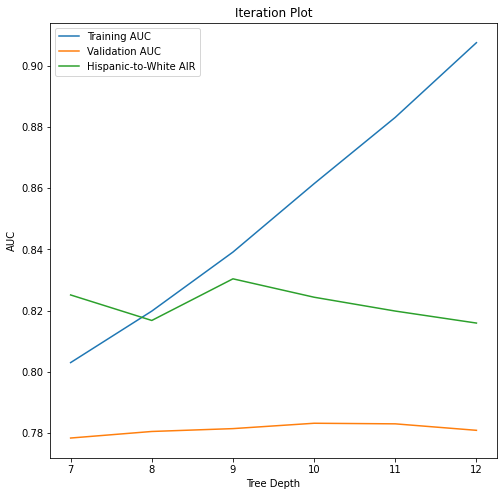

In [ ]:
# plot tree depth vs. training and validation AUC and AIR
# using simple pandas plotting and matplotlib
candidate_results = pd.DataFrame.from_dict(candidate_models, orient='index')
fig, ax = plt.subplots(figsize=(8, 8))
_ = candidate_results[['Training AUC', 'Validation AUC', 'Hispanic-to-White AIR']].plot(title='Iteration Plot',
                                                                                        ax=ax)
_ = ax.set_xlabel('Tree Depth')
_ = ax.set_ylabel('AUC')

In [ ]:
candidate_results.iloc[:, 1:]

Training AUC  Validation AUC  5-fold SD  Hispanic-to-White AIR
7       0.803029        0.778386   0.019177               0.825128
8       0.819847        0.780529   0.018745               0.816792
9       0.839130        0.781460   0.017505               0.830394
10      0.861474        0.783215   0.015329               0.824383
11      0.883138        0.783021   0.018437               0.819863
12      0.907531        0.780905   0.016968               0.815943

In [ ]:
best_model = candidate_models[9]['Models']

test_phat = best_model.predict_proba(test_X)[:, 1]
print('Test AUC: %.4f' % roc_auc_score(test_y, test_phat))

Test AUC: 0.7731
